In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## Load the tree data

In [2]:
dorrigo_df = pd.read_csv("Dorrigo.csv", header=0, index_col=0)
nightcap_df = pd.read_csv("Nightcap.csv", header=0, index_col=0)
washpool_df = pd.read_csv("Washpool.csv", header=0, index_col=0)
site_df = {"Dorrigo":dorrigo_df, "Nightcap":nightcap_df, "Washpool":washpool_df}
for site, df in site_df.items():
    print("{} richness {}".format(site, len(df)))
    display(df[:2])

## Get metacommunity trait distribution (pool all traits for all sites)
metacommunity_traits = pd.concat([dorrigo_df, nightcap_df, washpool_df], axis=0)
metacommunity_traits = metacommunity_traits["trait"].unique()

Nightcap richness 51


,pi,trait
Acacia melanoxylon,0.000010,0.045522
Acradenia euodiiformis,0.000084,0.933994


Dorrigo richness 53


,pi,trait
Acacia melanoxylon,0.001527,0.045522
Acradenia euodiiformis,0.000678,0.933994


Washpool richness 53


,pi,trait
Acacia melanoxylon,0.000028,0.045522
Acronychia oblongifolia,0.000007,0.601673


# Select the best model

In [26]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/full-parameter-estimation/default_MESS/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=df, simfile=simfile, algorithm="rf",\
                                metacommunity_traits=metacommunity_traits, verbose=False)
for isl, df in site_df.items():
    cla.set_data(df)
    est, proba = cla.predict(select_features=True, param_search=True, quick=True, verbose=False)
    display(isl, est, proba)
    display(cla.feature_importances())

Got empirical summary statistics:     S      pi_h1      pi_h2     pi_h3     pi_h4   mean_pi   std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  trees  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  mean_regional_traits  std_regional_traits  skewness_regional_traits  kurtosis_regional_traits  median_regional_traits  iqr_regional_traits  reg_loc_mean_trait_dif  reg_loc_std_trait_dif  reg_loc_skewness_trait_dif  reg_loc_kurtosis_trait_dif  reg_loc_median_trait_dif  reg_loc_iqr_trait_dif  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  51  17.683326  11.320576  9.444457  8.628991  0.000096  0.00018     2.688866     6.266857   0.000031  0.000068      0           0.081025           0.91247               0.294209              -1.192693            -0.045966          1.676364             -0.005284             0.894442                  0.351811                 -1.047542          

'Nightcap'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.221307,0.292863,0.48583


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,median_pi,iqr_pi,std_local_traits,kurtosis_local_traits,iqr_local_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,iqr_regional_traits,reg_loc_std_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_iqr_trait_dif,SGD_0,SGD_1,SGD_2
Feature importance,0.030981,0.035474,0.025919,0.022746,0.023367,0.069039,0.096601,0.01141,0.046065,0.057031,0.039927,0.048971,0.037345,0.041813,0.057292,0.070213,0.105413,0.034529,0.063368,0.030043,0.040272,0.012181


'Dorrigo'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.208635,0.289485,0.50188


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,median_pi,iqr_pi,std_local_traits,kurtosis_local_traits,iqr_local_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,iqr_regional_traits,reg_loc_std_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_iqr_trait_dif,SGD_0,SGD_1,SGD_2
Feature importance,0.030981,0.035474,0.025919,0.022746,0.023367,0.069039,0.096601,0.01141,0.046065,0.057031,0.039927,0.048971,0.037345,0.041813,0.057292,0.070213,0.105413,0.034529,0.063368,0.030043,0.040272,0.012181


'Washpool'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.216363,0.296447,0.48719


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,median_pi,iqr_pi,std_local_traits,kurtosis_local_traits,iqr_local_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,iqr_regional_traits,reg_loc_std_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_iqr_trait_dif,SGD_0,SGD_1,SGD_2
Feature importance,0.030981,0.035474,0.025919,0.022746,0.023367,0.069039,0.096601,0.01141,0.046065,0.057031,0.039927,0.048971,0.037345,0.041813,0.057292,0.070213,0.105413,0.034529,0.063368,0.030043,0.040272,0.012181


In [19]:
cla.dump("Australian_trees-Classifier.joblib")

# Estimate parameters

In [27]:
rgr = MESS.inference.Regressor(empirical_df=df, simfile=simfile, target_model="neutral",\
                                algorithm="rfq", metacommunity_traits=metacommunity_traits)
for isl, df in site_df.items():
    #rgr.set_targets(target_list=["alpha", "_lambda"])
    cla.set_data(df)
    est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=False)
    display(isl, est, rgr.feature_importances())

'Nightcap'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1883.5,5.062472,3174.5,0.003851,261.0,0.002495,0.478808
lower 0.025,1037.0,0.067040,1246.0,0.001149,39.0,0.000906,0.052370
upper 0.975,3876.0,9.807670,4909.0,0.006750,703.0,0.003900,0.814360


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.014989,0.011757,0.007803,0.007194,0.007486,0.080573,0.025002,0.016597,0.016015,0.256565,0.035182,0.0,0.010693,0.016122,0.026906,0.024300,0.013309,0.038899,0.012855,0.017886,0.019804,0.018541,0.013101,0.020331,0.017620,0.029947,0.020102,0.025451,0.023009,0.052596,0.025247,0.038146,0.010524,0.010287,0.007156,0.006216,0.005596,0.005024,0.004681,0.003147,0.003339
ecological_strength,0.019334,0.019207,0.017048,0.016003,0.014583,0.023988,0.021129,0.025775,0.031964,0.014904,0.022767,0.0,0.031015,0.027136,0.038315,0.038279,0.030079,0.039513,0.022018,0.036635,0.033319,0.027076,0.027891,0.028412,0.030474,0.038987,0.035499,0.042764,0.031265,0.029280,0.043545,0.021727,0.018397,0.022714,0.019407,0.010715,0.016484,0.010907,0.006895,0.006352,0.008198
J,0.371876,0.056322,0.013136,0.008618,0.011724,0.020978,0.035470,0.013449,0.014192,0.005784,0.010674,0.0,0.014862,0.016357,0.019091,0.018835,0.014188,0.016695,0.012673,0.017593,0.018484,0.020393,0.012489,0.022377,0.017730,0.022735,0.021857,0.018820,0.019701,0.025532,0.030814,0.015640,0.010504,0.010219,0.010143,0.008824,0.006279,0.004069,0.003840,0.003243,0.003790
m,0.132134,0.026494,0.016629,0.015452,0.024634,0.025519,0.018197,0.011976,0.011892,0.003544,0.009074,0.0,0.011320,0.015601,0.019595,0.020320,0.013217,0.046854,0.011636,0.019505,0.083774,0.033142,0.020468,0.152499,0.019223,0.025138,0.022148,0.036964,0.018440,0.024069,0.018951,0.032261,0.010321,0.008363,0.008713,0.008224,0.007080,0.006502,0.003763,0.003507,0.002859
generation,0.024851,0.012977,0.005268,0.014171,0.013507,0.078030,0.041050,0.018272,0.016985,0.017858,0.015423,0.0,0.014103,0.015160,0.016098,0.016378,0.010841,0.018945,0.012487,0.043390,0.026961,0.015695,0.013889,0.024742,0.040433,0.062570,0.051704,0.134057,0.044867,0.034378,0.027563,0.040797,0.011175,0.007266,0.009553,0.012287,0.012460,0.005695,0.005011,0.010140,0.002961
speciation_prob,0.054845,0.010814,0.006782,0.007364,0.009367,0.093661,0.059100,0.010234,0.011373,0.002685,0.009083,0.0,0.010245,0.014297,0.030372,0.034424,0.016754,0.062896,0.012033,0.015726,0.019087,0.015996,0.007975,0.013927,0.015920,0.012398,0.013625,0.019475,0.011598,0.016100,0.016717,0.318364,0.008839,0.007581,0.006793,0.005265,0.006829,0.003311,0.003369,0.002651,0.002126
_lambda,0.015270,0.034814,0.010221,0.007045,0.007874,0.088180,0.057792,0.009107,0.011273,0.008030,0.026557,0.0,0.011428,0.012067,0.018414,0.020441,0.012833,0.014903,0.010125,0.018440,0.025358,0.022639,0.011123,0.037342,0.024843,0.038790,0.023282,0.052633,0.036842,0.240365,0.020240,0.012589,0.020419,0.008895,0.005674,0.007524,0.005130,0.003344,0.002914,0.002724,0.002515


'Dorrigo'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1883.5,5.062472,3174.5,0.003851,261.0,0.002495,0.478808
lower 0.025,1037.0,0.067040,1246.0,0.001149,39.0,0.000906,0.052370
upper 0.975,3876.0,9.807670,4909.0,0.006750,703.0,0.003900,0.814360


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.014989,0.011757,0.007803,0.007194,0.007486,0.080573,0.025002,0.016597,0.016015,0.256565,0.035182,0.0,0.010693,0.016122,0.026906,0.024300,0.013309,0.038899,0.012855,0.017886,0.019804,0.018541,0.013101,0.020331,0.017620,0.029947,0.020102,0.025451,0.023009,0.052596,0.025247,0.038146,0.010524,0.010287,0.007156,0.006216,0.005596,0.005024,0.004681,0.003147,0.003339
ecological_strength,0.019334,0.019207,0.017048,0.016003,0.014583,0.023988,0.021129,0.025775,0.031964,0.014904,0.022767,0.0,0.031015,0.027136,0.038315,0.038279,0.030079,0.039513,0.022018,0.036635,0.033319,0.027076,0.027891,0.028412,0.030474,0.038987,0.035499,0.042764,0.031265,0.029280,0.043545,0.021727,0.018397,0.022714,0.019407,0.010715,0.016484,0.010907,0.006895,0.006352,0.008198
J,0.371876,0.056322,0.013136,0.008618,0.011724,0.020978,0.035470,0.013449,0.014192,0.005784,0.010674,0.0,0.014862,0.016357,0.019091,0.018835,0.014188,0.016695,0.012673,0.017593,0.018484,0.020393,0.012489,0.022377,0.017730,0.022735,0.021857,0.018820,0.019701,0.025532,0.030814,0.015640,0.010504,0.010219,0.010143,0.008824,0.006279,0.004069,0.003840,0.003243,0.003790
m,0.132134,0.026494,0.016629,0.015452,0.024634,0.025519,0.018197,0.011976,0.011892,0.003544,0.009074,0.0,0.011320,0.015601,0.019595,0.020320,0.013217,0.046854,0.011636,0.019505,0.083774,0.033142,0.020468,0.152499,0.019223,0.025138,0.022148,0.036964,0.018440,0.024069,0.018951,0.032261,0.010321,0.008363,0.008713,0.008224,0.007080,0.006502,0.003763,0.003507,0.002859
generation,0.024851,0.012977,0.005268,0.014171,0.013507,0.078030,0.041050,0.018272,0.016985,0.017858,0.015423,0.0,0.014103,0.015160,0.016098,0.016378,0.010841,0.018945,0.012487,0.043390,0.026961,0.015695,0.013889,0.024742,0.040433,0.062570,0.051704,0.134057,0.044867,0.034378,0.027563,0.040797,0.011175,0.007266,0.009553,0.012287,0.012460,0.005695,0.005011,0.010140,0.002961
speciation_prob,0.054845,0.010814,0.006782,0.007364,0.009367,0.093661,0.059100,0.010234,0.011373,0.002685,0.009083,0.0,0.010245,0.014297,0.030372,0.034424,0.016754,0.062896,0.012033,0.015726,0.019087,0.015996,0.007975,0.013927,0.015920,0.012398,0.013625,0.019475,0.011598,0.016100,0.016717,0.318364,0.008839,0.007581,0.006793,0.005265,0.006829,0.003311,0.003369,0.002651,0.002126
_lambda,0.015270,0.034814,0.010221,0.007045,0.007874,0.088180,0.057792,0.009107,0.011273,0.008030,0.026557,0.0,0.011428,0.012067,0.018414,0.020441,0.012833,0.014903,0.010125,0.018440,0.025358,0.022639,0.011123,0.037342,0.024843,0.038790,0.023282,0.052633,0.036842,0.240365,0.020240,0.012589,0.020419,0.008895,0.005674,0.007524,0.005130,0.003344,0.002914,0.002724,0.002515


'Washpool'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1883.5,5.062472,3174.5,0.003851,261.0,0.002495,0.478808
lower 0.025,1037.0,0.067040,1246.0,0.001149,39.0,0.000906,0.052370
upper 0.975,3876.0,9.807670,4909.0,0.006750,703.0,0.003900,0.814360


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.014989,0.011757,0.007803,0.007194,0.007486,0.080573,0.025002,0.016597,0.016015,0.256565,0.035182,0.0,0.010693,0.016122,0.026906,0.024300,0.013309,0.038899,0.012855,0.017886,0.019804,0.018541,0.013101,0.020331,0.017620,0.029947,0.020102,0.025451,0.023009,0.052596,0.025247,0.038146,0.010524,0.010287,0.007156,0.006216,0.005596,0.005024,0.004681,0.003147,0.003339
ecological_strength,0.019334,0.019207,0.017048,0.016003,0.014583,0.023988,0.021129,0.025775,0.031964,0.014904,0.022767,0.0,0.031015,0.027136,0.038315,0.038279,0.030079,0.039513,0.022018,0.036635,0.033319,0.027076,0.027891,0.028412,0.030474,0.038987,0.035499,0.042764,0.031265,0.029280,0.043545,0.021727,0.018397,0.022714,0.019407,0.010715,0.016484,0.010907,0.006895,0.006352,0.008198
J,0.371876,0.056322,0.013136,0.008618,0.011724,0.020978,0.035470,0.013449,0.014192,0.005784,0.010674,0.0,0.014862,0.016357,0.019091,0.018835,0.014188,0.016695,0.012673,0.017593,0.018484,0.020393,0.012489,0.022377,0.017730,0.022735,0.021857,0.018820,0.019701,0.025532,0.030814,0.015640,0.010504,0.010219,0.010143,0.008824,0.006279,0.004069,0.003840,0.003243,0.003790
m,0.132134,0.026494,0.016629,0.015452,0.024634,0.025519,0.018197,0.011976,0.011892,0.003544,0.009074,0.0,0.011320,0.015601,0.019595,0.020320,0.013217,0.046854,0.011636,0.019505,0.083774,0.033142,0.020468,0.152499,0.019223,0.025138,0.022148,0.036964,0.018440,0.024069,0.018951,0.032261,0.010321,0.008363,0.008713,0.008224,0.007080,0.006502,0.003763,0.003507,0.002859
generation,0.024851,0.012977,0.005268,0.014171,0.013507,0.078030,0.041050,0.018272,0.016985,0.017858,0.015423,0.0,0.014103,0.015160,0.016098,0.016378,0.010841,0.018945,0.012487,0.043390,0.026961,0.015695,0.013889,0.024742,0.040433,0.062570,0.051704,0.134057,0.044867,0.034378,0.027563,0.040797,0.011175,0.007266,0.009553,0.012287,0.012460,0.005695,0.005011,0.010140,0.002961
speciation_prob,0.054845,0.010814,0.006782,0.007364,0.009367,0.093661,0.059100,0.010234,0.011373,0.002685,0.009083,0.0,0.010245,0.014297,0.030372,0.034424,0.016754,0.062896,0.012033,0.015726,0.019087,0.015996,0.007975,0.013927,0.015920,0.012398,0.013625,0.019475,0.011598,0.016100,0.016717,0.318364,0.008839,0.007581,0.006793,0.005265,0.006829,0.003311,0.003369,0.002651,0.002126
_lambda,0.015270,0.034814,0.010221,0.007045,0.007874,0.088180,0.057792,0.009107,0.011273,0.008030,0.026557,0.0,0.011428,0.012067,0.018414,0.020441,0.012833,0.014903,0.010125,0.018440,0.025358,0.022639,0.011123,0.037342,0.024843,0.038790,0.023282,0.052633,0.036842,0.240365,0.020240,0.012589,0.020419,0.008895,0.005674,0.007524,0.005130,0.003344,0.002914,0.002724,0.002515


In [ ]:
cla.dump("Australian_trees-Regressor.joblib")

  [####################] 100% Performing simulations 
Calculating PCs and plotting
  [####################] 100% Performing simulations 
Calculating PCs and plotting
  [####################] 100% Performing simulations 
Calculating PCs and plotting


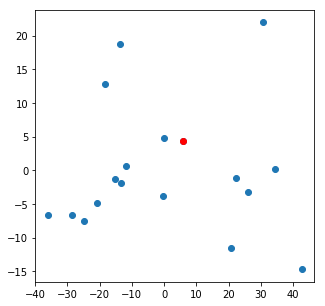

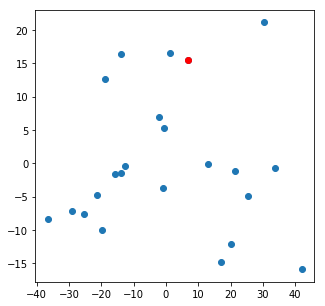

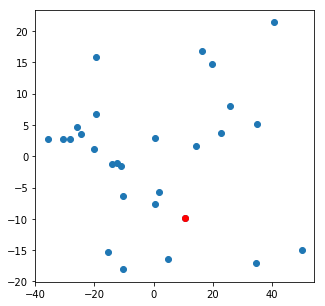

In [29]:
for isl, df in site_df.items():
    MESS.posterior_predictive_check(empirical_df=df, nsims=5, parameter_estimates=est, verbose=True)

## Save regressor to file/model to file

In [150]:
rgr.feature_importances()
#rgr.model_by_target

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.015795,0.066961,0.018036,0.012658,0.025727,0.027068,0.009332,0.002480,0.002773,0.275834,0.008189,0.022957,0.010469,0.004996,0.369852,0.0,0.059932,0.050365,0.001897,0.001806,0.002297,0.002108,0.004731,0.002443,0.000570,0.000000,0.000721
_lambda,0.006080,0.018718,0.006266,0.040721,0.859859,0.003194,0.001113,0.004015,0.001348,0.009954,0.010465,0.003409,0.005999,0.001550,0.002724,0.0,0.006535,0.013376,0.001096,0.000300,0.000758,0.000035,0.000916,0.000294,0.000857,0.000169,0.000251


# Trash below here

In [56]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile, algorithm="rf", verbose=True)
cla._base_model
cla.y[:2]
#rgr.set_targets(target_list="_lambda")
#rgr.predict(select_features=True, quick=False, verbose=True)

Got empirical summary statistics:     S   abund_h1   abund_h2   abund_h3  abund_h4      pi_h1      pi_h2      pi_h3      pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi   iqr_pi  trees  abundance_pi_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  57  22.334174  14.092503  10.622744  8.877024  27.956422  21.660417  19.178423  17.853145  0.008283  0.010581      1.41016     0.756963   0.003258  0.01004      0          0.413119     32      7      5      0      2      4      1      3      1      2


,community_assembly_model
0,neutral
1,neutral


In [ ]:
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    cla = MESS.inference.Classifier(empirical_df=df, simfile=simfile, algorithm="rf")
    est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=False)
    display(isl, est, proba)
    display(cla.feature_importances())
    rgr = MESS.inference.Regressor(empirical_df=df, simfile=simfile, algorithm="rfq")

    est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=True)
    display(isl, est, rgr.feature_importances())